In [1]:
#%matplotlib widget
# jeśli wykresy nie będą działać - usuń (zakomentuj) powyższą linijkę i zrestartuj kernel notebooka

import numpy as np
import matplotlib.pyplot as plt

##### 

---

Użyj odpowiednich funkcji pakietu NumPy aby zdefiniować 
- macierz 3x3 o zadanych wartościach (dowolnych)
- macierz jednostkową o wymiarze 3x3

1. Oblicz "ręcznie" wyznaczniki wygenerowanych macierzy
2. Porównaj uzyskane wyniki z funkcją ```np.linalg.det```


In [2]:
A = np.matrix(
    [
        [ 4,2,5 ],
        [ 6,4,2 ],
        [ 1,4,6 ]
    ]
)
w=(A[0,0]*A[1,1]*A[2,2])+(A[0,1]*A[1,2]*A[2,0])+(A[1,0]*A[2,1]*A[0,2])-(A[0,0]*A[1,2]*A[2,1])-(A[0,1]*A[1,0]*A[2,2])-(A[0,2]*A[1,1]*A[2,0])
print (w)
np.linalg.det (A)


96


95.99999999999999

---

Dany jest układ równań o postaci

$$
\left\{ \begin{array}{ll}
2x - y = -1\\
3x +y =16
\end{array} \right.
$$

          
Rozwiąż ten układ równań metodą wyznaczników.

In [3]:
# W =    np.array(...) lub np.matrix(...)
# Wx = 
# Wy = 


# policzyć wyznaczniki np. za pomocą funkcji np.linalg.det
# wW = ...
# wWx
# wWy
#print (wW, wWx, wWy)

# sprawdzić przypadki szczególne

# podać rozwiązanie
# x=
# y=wWy/wW
# print(x,y)

In [4]:
W = np.matrix(
    [
        [2,-1],
        [3,1]
    ]
)
Wx = np.matrix(
    [
        [-1,-1],
        [16,1]
    ]
)
Wy = np.matrix(
    [
        [2,-1],
        [3,16]
    ]
)
wW= np.linalg.det (W)
wWx = np.linalg.det (Wx)
wWy= np.linalg.det (Wy)
if(wW==0):
    print ("wW nie może wynosić 0")
else:    
    print (wW,wWx,wWy)
    x= wWx/wW
    y= wWy/wW
    print (x,y)




5.000000000000001 15.0 35.00000000000001
2.9999999999999996 7.0


Powyższy układ równań możemy zapisać "macierzowo" (zamiast x i y użyłem zapisu x_1 i x_2)

$$
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}
=
\begin{bmatrix}
c_1 \\
c_2
\end{bmatrix}
$$
To samo możemy zapisać jako
$$
AX=C
$$

Gdybyśmy znali macierz odwrotną do A, to moglibyśmy obie strony tego równania przemnożyć lewostronnie:
$$
A^{-1}AX=A^{-1}C
$$
co dałoby nam
$$
IX=A^{-1}C
$$
czyli
$$
X=A^{-1}C
$$

Wykorzystajcie to, że w NumPy można podnieść macierz do dowolnej potęgi i spróbujcie w ten sposób rozwiązać powyższy uład równań

In [5]:
# wprowadź współczynniki macierzy A
# A = np.matrix(
#[
#    [ ... ],
#    [ ... ]
#])

# oblicz AA jako odwrotność A
# AA = 

# wprowadź współczynniki macierzy C
# C = np.matrix(...)

# Oblicz iloczyn odwrotności macierzy A i C
# X =
# print(X)

# sprawdź , czy AA*A daje macierz jednostkową
# I = 
# print(I.round(2))

In [6]:
A= np.matrix(
    [
        [1,2],
        [3,4]
    ]
)
wA= np.linalg.det (A)
if (wA!=0):
    print ("A= ",A)
    AA= (A**-1)
    print ("AA= ",AA)
    I= AA*A
    print ("I= ",I.round(2))

    C= np.matrix(
        [
            [3,],
            [4,]
        ]
    )
    x= (A**-1)*C
    print  ("x= ",x)
else: 
    print ("macierz nie jest odwracalna")

A=  [[1 2]
 [3 4]]
AA=  [[-2.   1. ]
 [ 1.5 -0.5]]
I=  [[1. 0.]
 [0. 1.]]
x=  [[-2. ]
 [ 2.5]]


Porównaj uzyskane rezultaty z wynikiem działania funkcji ```np.linalg.solve```


---

Proste wykresy funkcji możemy sobie stworzyć korzystając z następującej metody

1. definiujemy wektor przechowujący kolejne wartości na osi OX, np. 100 wartości z zakresu 4...10

x = np.linspace(4, 10, 100)

2. obliczamy wartości funkcji w tych punktach

y = 2*x+2

3. rysujemy wykres

plt.plot(x, y)


Narysuj graficzne rozwiązanie powyższego układu równań


In [7]:
# przekształćmy równanie do postaci "funkcyjnej"
# 2x - y = -1
# 3x + y = 16
#
# y = 
# y = 

# nasze rozwiązanie jest w okolicach punktu (3,7)
# x = np.linspace(....)

# wykres 1
# plt.plot(...)
# wykres 2
 


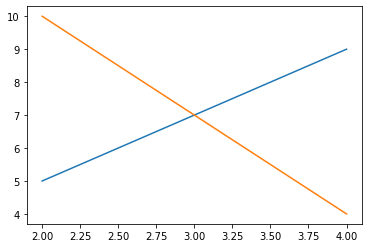

In [8]:

x = np.linspace (2,4,100)
y1=2*x+1
y2=16-3*x
plt.plot(x,y1)
plt.plot(x,y2)


---
Przetestuj działanie funkcji ```np.hstack``` i ```np.vstack``` aby "skleić" ze sobą dwie wygenerowane na początku zajęć macierze

---

Jedną z metod wyznaczania macierzy odwrotnej jest metoda eliminacji Gaussa-Jordana. Polega ona na tym, że do naszej macierzy A "doklejamy" macierz jednostkową I

[ A | I ]

Teraz, stosując dozwolone operacje 
- mnożenie wiersza przez stałą <> 0
- dodawanie do wiersza innego wiersza (przemnożonego przez stałą <> 0)
- zamianę wierszy miejscami

dążymy do tego, aby uzyskać macierz postaci [ I | B ]

Jeśli nam się to uda, to B będzie macierzą odwrotną do A.


In [9]:
# przykład:

A = np.matrix(
    [
        [ 5, 6 ],
        [ 4, 5 ]
    ]
)
print (A)

[[5 6]
 [4 5]]


In [10]:
I = np.eye(2)
print (I)

[[1. 0.]
 [0. 1.]]


In [11]:
M = np.hstack([A, I])
print (M)

[[5. 6. 1. 0.]
 [4. 5. 0. 1.]]


In [12]:
# odejmijmy od drugiego wiersza wiersz pierwszy przemnożony przez 4/5
M[1,:] -= 4/5*M[0,:]
print (M)

[[ 5.   6.   1.   0. ]
 [ 0.   0.2 -0.8  1. ]]


In [13]:
# od pierwszego wiersza odejmijmy wiersz drugi przemnożony przez 30
M[0,:] -= 30*M[1,:]
print (M)

[[ 5.00000000e+00  2.13162821e-14  2.50000000e+01 -3.00000000e+01]
 [ 0.00000000e+00  2.00000000e-01 -8.00000000e-01  1.00000000e+00]]


In [14]:
# podzielmy pierwszy wiersz przez 5 i drugi przez 0.2
M[0,:] /= 5
M[1,:] /= 0.2

print (M)

[[ 1.00000000e+00  4.26325641e-15  5.00000000e+00 -6.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -4.00000000e+00  5.00000000e+00]]


In [15]:
# czy to co jest po lewej stronie jest wystarczająco bliskie macierzy jednostkowej ?
print (M.round(2))

[[ 1.  0.  5. -6.]
 [ 0.  1. -4.  5.]]


In [16]:
# wyciągnijmy "prawą" stronę
B = M[:, 2:]

In [17]:
# i sprawdźmy, czy jest taki jak A^{-1}
print (B)
print (A**-1)

[[ 5. -6.]
 [-4.  5.]]
[[ 5. -6.]
 [-4.  5.]]


Stosując powyższą metodę - wyznacz macierz odwrotną do macierzy

$$
\begin{bmatrix}
1 & 2 & 3 \\
0 & 1 & 4 \\
5 & 6 & 0
\end{bmatrix}
$$


In [20]:
a= np.matrix(
[
    [1,2,3],
    [0,1,4],
    [5,6,0]
]
)
print (a)

[[1 2 3]
 [0 1 4]
 [5 6 0]]


In [21]:
i=np.eye(3)
print (i)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [42]:
m=np.hstack([a,i])
print (m)

[[1. 2. 3. 1. 0. 0.]
 [0. 1. 4. 0. 1. 0.]
 [5. 6. 0. 0. 0. 1.]]


In [43]:
m[0,:]-=3/4*m[1,:]
print(m)


[[ 1.    1.25  0.    1.   -0.75  0.  ]
 [ 0.    1.    4.    0.    1.    0.  ]
 [ 5.    6.    0.    0.    0.    1.  ]]


In [44]:
m[2,:]-=5*m[0,:]
print(m)

[[ 1.    1.25  0.    1.   -0.75  0.  ]
 [ 0.    1.    4.    0.    1.    0.  ]
 [ 0.   -0.25  0.   -5.    3.75  1.  ]]


In [45]:
m[0,:]+=5*m[2,:]
print (m)

[[  1.     0.     0.   -24.    18.     5.  ]
 [  0.     1.     4.     0.     1.     0.  ]
 [  0.    -0.25   0.    -5.     3.75   1.  ]]


In [46]:
m[2,:]-=1/4*m[1,:]
print (m)

[[  1.    0.    0.  -24.   18.    5. ]
 [  0.    1.    4.    0.    1.    0. ]
 [  0.   -0.5  -1.   -5.    3.5   1. ]]


In [47]:
m[2,:]+=1/2*m[1,:]
print(m)

[[  1.   0.   0. -24.  18.   5.]
 [  0.   1.   4.   0.   1.   0.]
 [  0.   0.   1.  -5.   4.   1.]]


In [48]:
m[1,:]-=4*m[2,:]
print (m)

[[  1.   0.   0. -24.  18.   5.]
 [  0.   1.   0.  20. -15.  -4.]
 [  0.   0.   1.  -5.   4.   1.]]


In [54]:
b=m[:,3:]
print (b)

[[-24.  18.   5.]
 [ 20. -15.  -4.]
 [ -5.   4.   1.]]


In [23]:
# sprawdzenie
print (a**-1)

[[-24.  18.   5.]
 [ 20. -15.  -4.]
 [ -5.   4.   1.]]
